In [1]:
%matplotlib inline

In [38]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude
from kid_readout.analysis.timeseries import iqnoise

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-27_134430_sweep_stream_simultaneous/')

In [4]:
npd.node_names()

['SweepStreamArray0', 'ADCSnap1', 'SweepStreamArray2', 'ADCSnap3']

In [5]:
all_ssa = [npd.read(name) for name in npd.node_names() if name.startswith('SweepStreamArray')]

In [6]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [7]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(73.0, 71.0), (20.0, 21.0)]

In [9]:
for ssa in all_ssa:
    temperature.add_temperature(ssa, cryostat='hpd')

retrying...
retrying...
retrying...
retrying...
retrying...
retrying...
retrying...


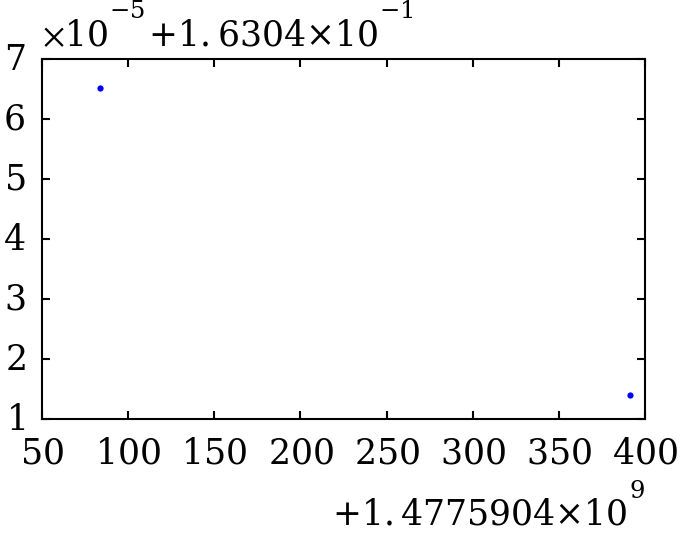

In [10]:
fig, ax = plt.subplots()
ax.plot([ssa.stream_array.epoch for ssa in all_ssa],
        [ssa.state.temperature.package for ssa in all_ssa],
        '.b')

df = pd.concat([sss.to_dataframe() for sss in all_sss])
np.save(npd.root_path.split('/')[-2] + '.npy', df.to_records())
df.shape

Qi: 96637; Qc: 19773


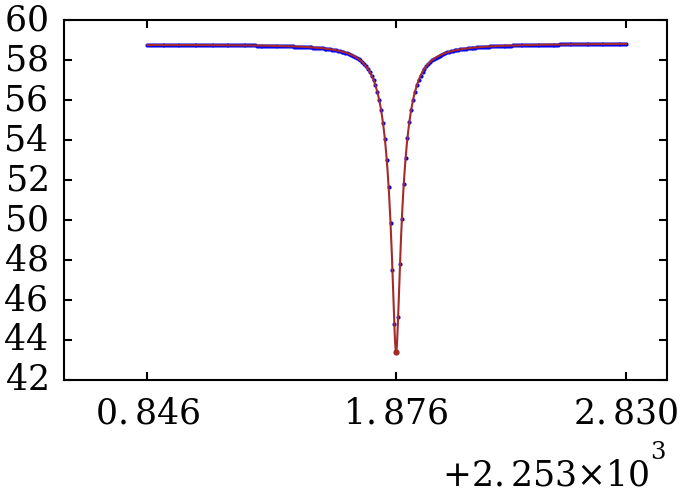

In [13]:
number = 0
fig, ax = plt.subplots()
for ssa in all_ssa[:1]:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 18523; Qc: 37810


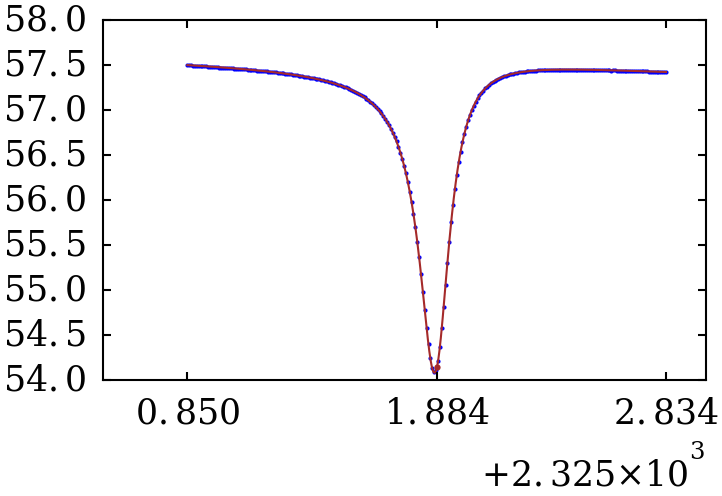

In [14]:
number = 1
fig, ax = plt.subplots()
for ssa in all_ssa[:1]:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 24812; Qc: 3751


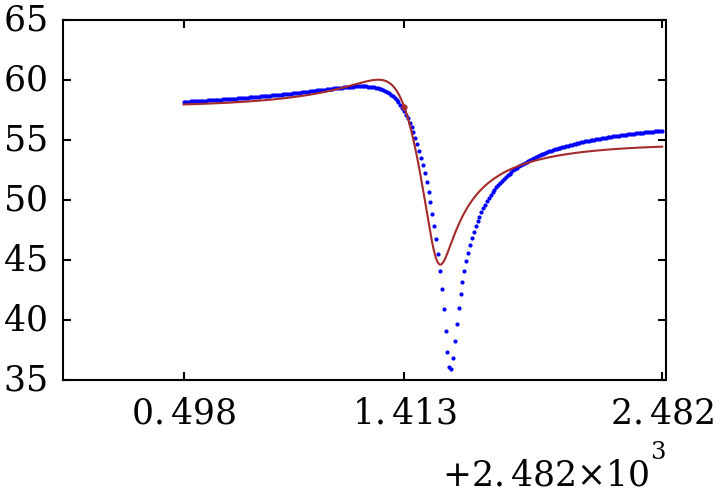

In [15]:
number = 2
fig, ax = plt.subplots()
for ssa in all_ssa[:1]:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 9788; Qc: 9148401


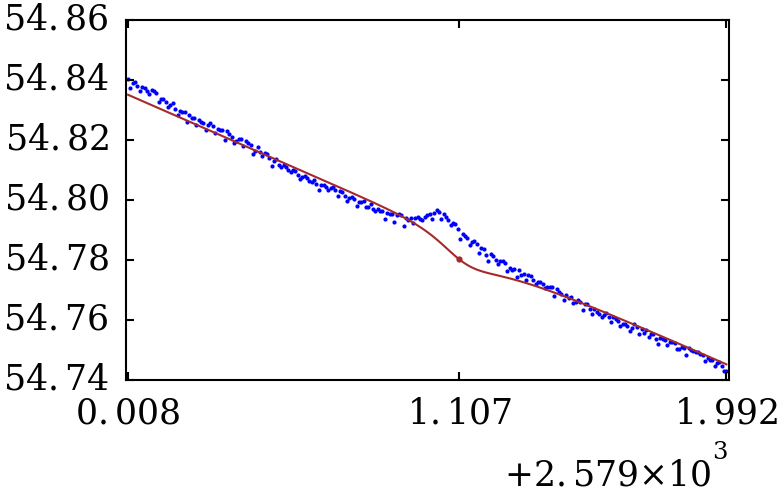

In [16]:
number = 3
fig, ax = plt.subplots()
for ssa in all_ssa[:1]:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 126428; Qc: 189469


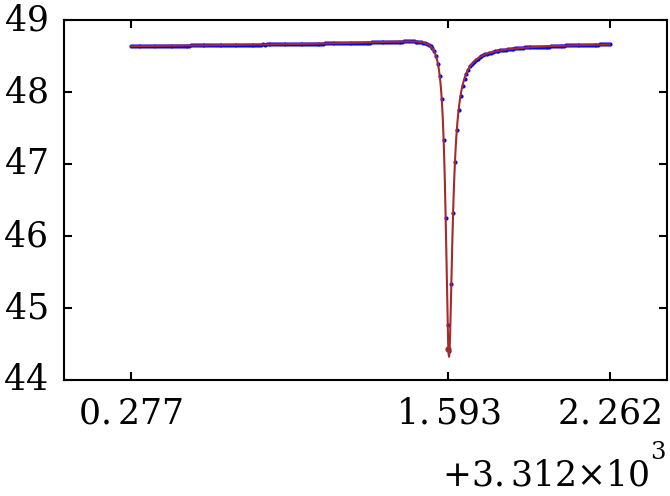

In [17]:
number = 0
ssas = all_ssa[1:]
fig, ax = plt.subplots()
for ssa in ssas:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 175600; Qc: 50092


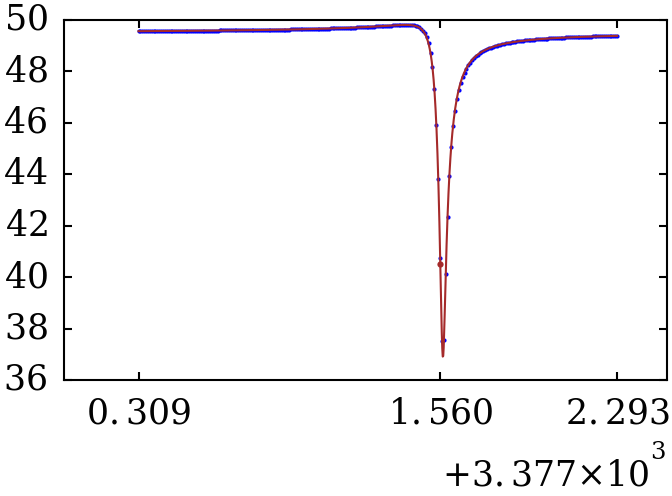

In [18]:
number = 1
ssas = all_ssa[1:]
fig, ax = plt.subplots()
for ssa in ssas:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 117160; Qc: 28346


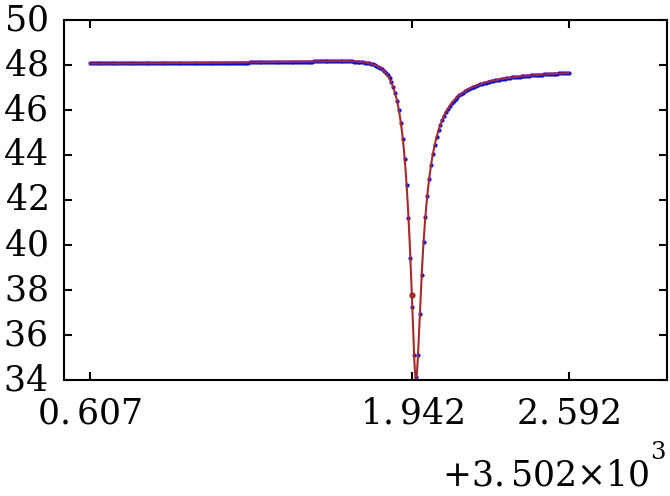

In [19]:
number = 2
ssas = all_ssa[1:]
fig, ax = plt.subplots()
for ssa in ssas:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 99713; Qc: 28423


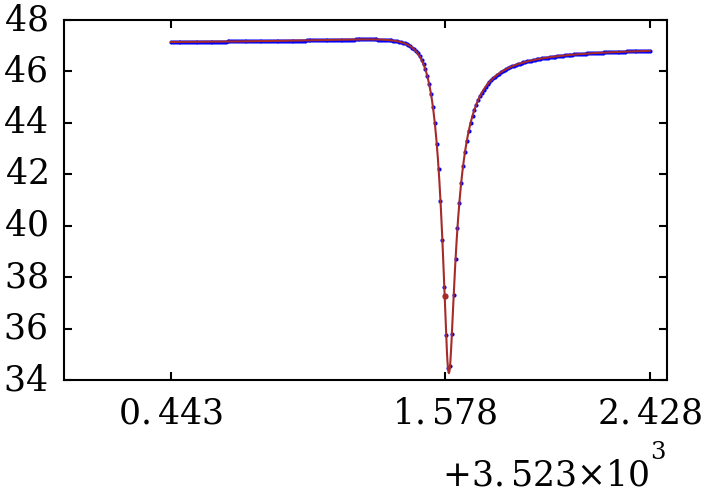

In [20]:
number = 3
ssas = all_ssa[1:]
fig, ax = plt.subplots()
for ssa in ssas:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

In [23]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

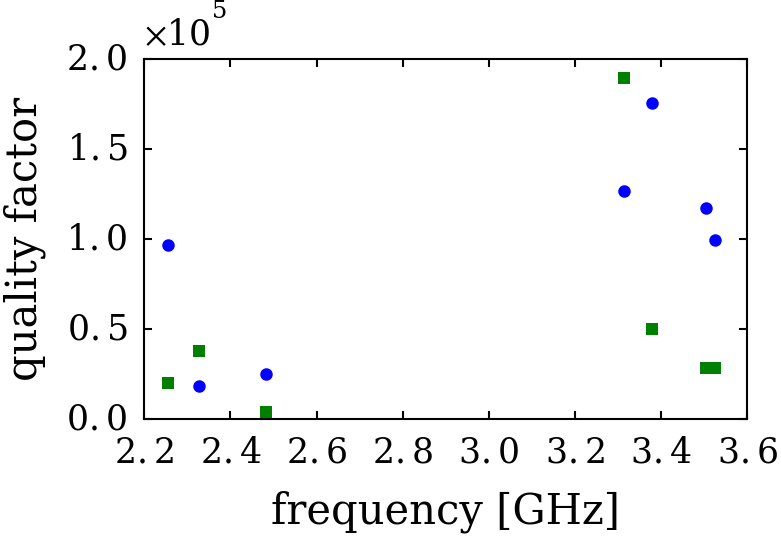

In [32]:
attenuation_index = 1
fig, ax = plt.subplots()
for index, ssa in enumerate(all_ssa):
    for number in range(ssa.num_channels):
        if index != 0 or number != 3:
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_i,
                    'o', color=Qi_color, label='$Q_i$')
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_e_real,
                    's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
#ax.legend(loc='upper center', numpoints=1)
#ax.set_xlim(1.9, 4.1)
#ax.set_ylim(0, 2e5)

In [35]:
colors = ['blue', 'green', 'red', 'gray', 'cyan', 'magenta', 'yellow', 'black']

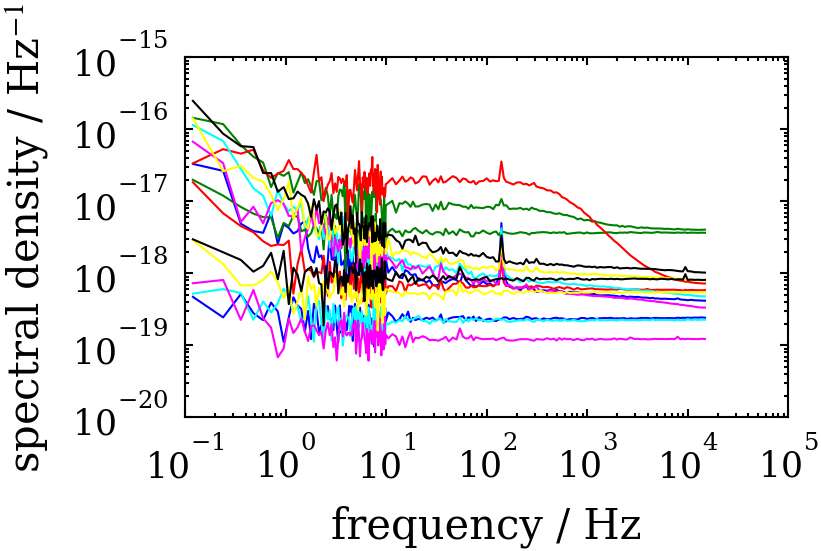

In [37]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')

for index, ssa in enumerate(all_ssa):
    for number in range(ssa.num_channels):
        if index != 0 or number != 3:
            ax.plot(ssa[number].S_frequency, ssa[number].S_xx,
                    color=colors[number + 4 * index])
            ax.plot(ssa[number].S_frequency, ssa[number].S_yy,
                    color=colors[number + 4 * index])

In [49]:
sss0 = all_ssa[0][0]
sss2 = all_ssa[0][2]
sss4 = all_ssa[1][0]
aac_0_2 = iqnoise.auto_auto_cross(sss0.x, sss2.x, sample_rate=sss0.stream.stream_sample_rate)
aac_0_4 = iqnoise.auto_auto_cross(sss0.x, sss4.x, sample_rate=sss0.stream.stream_sample_rate)

In [50]:
aac_0_2 = iqnoise.AutoAutoCross(*aac_0_2)
aac_0_4 = iqnoise.AutoAutoCross(*aac_0_4)

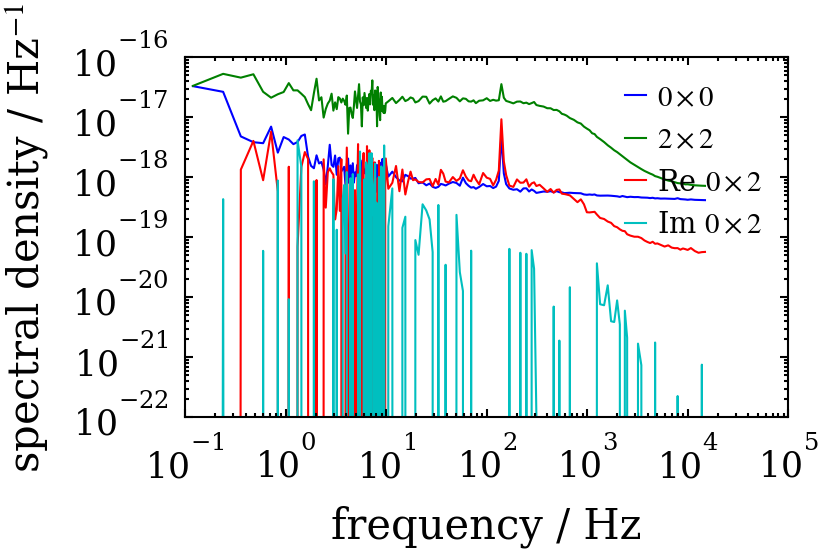

In [54]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')

ax.plot(aac_0_2.f, aac_0_2.S_XX, label=r'$0 \times 0$')
ax.plot(aac_0_2.f, aac_0_2.S_YY, label=r'$2 \times 2$')
ax.plot(aac_0_2.f, np.real(aac_0_2.S_XY), label=r'Re $0 \times 2$')
ax.plot(aac_0_2.f, np.imag(aac_0_2.S_XY), label=r'Im $0 \times 2$')
ax.legend(loc='upper right', fontsize='xx-small')

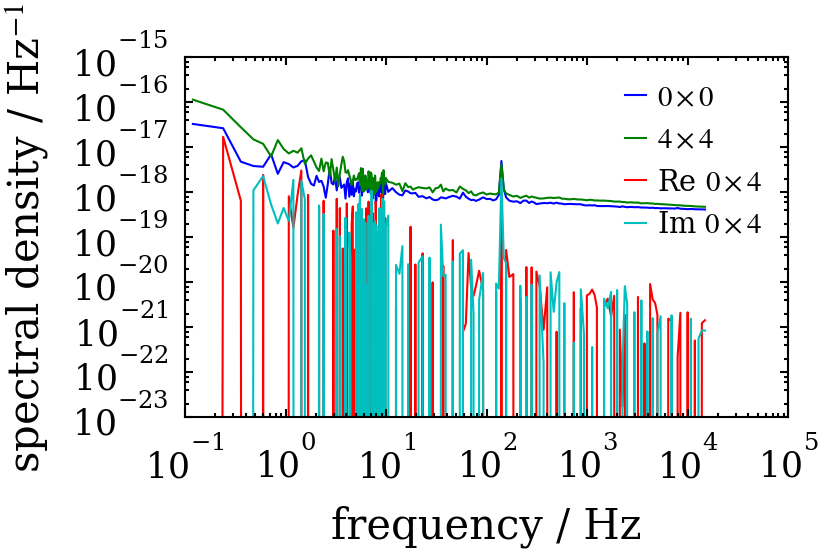

In [55]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')

ax.plot(aac_0_4.f, aac_0_4.S_XX, label=r'$0 \times 0$')
ax.plot(aac_0_4.f, aac_0_4.S_YY, label=r'$4 \times 4$')
ax.plot(aac_0_4.f, np.real(aac_0_4.S_XY), label=r'Re $0 \times 4$')
ax.plot(aac_0_4.f, np.imag(aac_0_4.S_XY), label=r'Im $0 \times 4$')
ax.legend(loc='upper right', fontsize='xx-small')